In [1]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

df = pd.read_csv("Games of the Future 2024 - BoxMatch.csv")

In [2]:
#mengambil data untuk tim RRQ Hoshi
pd.set_option('display.max_columns',None)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       640 non-null    object
 1   Stage      640 non-null    object
 2   Match      640 non-null    int64 
 3   Team       640 non-null    object
 4   Ban        640 non-null    object
 5   Role Ban   640 non-null    object
 6   Role Pick  640 non-null    object
 7   Players    640 non-null    object
 8   Pick       640 non-null    object
 9   MVP        640 non-null    int64 
 10  Time       640 non-null    object
 11  Spell      640 non-null    object
 12  Talent 3   640 non-null    object
 13  K          640 non-null    object
 14  D          640 non-null    object
 15  A          640 non-null    object
 16  Gold       640 non-null    object
 17  Rating     640 non-null    object
 18  Medal      640 non-null    object
 19  Level      640 non-null    object
 20  Win        640 non-null    objec

### **Most Pick Hero in Game of Future**

In [4]:
#most pick hero in tournament 


pick_hero = pd.crosstab(
    index=df['Pick'],
    columns=df['Win'],
    values=df['Win'],
    aggfunc='count'
).reset_index()
pick_hero = pick_hero.fillna(0)
pick_hero['Total Pick'] = pick_hero['Lose'] + pick_hero['Win']
pick_hero = pick_hero.sort_values(by='Total Pick',ascending=False)

pick_hero['win rate'] = round(pick_hero['Win'] / pick_hero['Total Pick'] * 100,2) 
pick_hero['efectivity'] = pick_hero['Win'] - pick_hero['Lose']
pick_hero = pick_hero[['Pick','Win','Lose','Total Pick','efectivity','win rate']]

#berdasarkan Total Pick
# >= 20 High-Recomended  : 3
# >= 10 - <20 Medium-Recomended : 2
# <10 Low-Recomended : 1

def rec_hero(x):
    '''berdasarkan frekuensi pick hero'''
    if x >= 20:
        value = 4
    elif x < 20 and x >= 15 :
        value = 3
    elif x < 15 and x > 5:
        value = 2
    else :
        value = 1
    return value

#berdasakan wirate
# >= 75% High-Recomended
# >= 50% Medium recomended
# >= 25% Low Medium Recomended
# < 5% very low recomended

def rec_hero_wr(x):
    '''berdasarkan winrate hero'''
    if x >= 75:
        value = 4
    elif x < 75 and x >= 50:
        value = 3
    elif x < 50 and x >= 25 :
        value = 2
    else:
        value = 1
    return value  



def eff_hero(x):
    if x > 0:
        value = 3
    elif x == 0:
        value = 2
    else :
        value = 1
    return value


#segmen satu >=9
#segmen dua <= 8 and >=6
#segmen dua <= 5 and <=3

def recomendation(x):
    if x >=9 :
        value = 'S'
    elif x >=6 and x <=8 :
        value = 'A'
    else :
        value = 'B'
    return value 

pick_hero['freq_hero'] = pick_hero['Total Pick'].apply(rec_hero)
pick_hero['win_hero'] = pick_hero['win rate'].apply(rec_hero_wr)
pick_hero['eff_hero'] = pick_hero['efectivity'].apply(eff_hero)
pick_hero['segmen'] = pick_hero['freq_hero'] + pick_hero['win_hero'] + pick_hero['eff_hero']
pick_hero['Tier Hero'] = pick_hero['segmen'].apply(recomendation)
pick_hero[:10]


Win,Pick,Win,Lose,Total Pick,efectivity,win rate,freq_hero,win_hero,eff_hero,segmen,Tier Hero
52,Ruby,18.0,24.0,42.0,-6.0,42.86,4,2,1,7,A
12,Claude,20.0,12.0,32.0,8.0,62.50,4,3,3,10,S
32,Karrie,10.0,19.0,29.0,-9.0,34.48,4,2,1,7,A
25,Guinevere,20.0,8.0,28.0,12.0,71.43,4,3,3,10,S
11,Cici,11.0,16.0,27.0,-5.0,40.74,4,2,1,7,A
2,Arlott,13.0,12.0,25.0,1.0,52.00,4,3,3,10,S
21,Fredrinn,13.0,11.0,24.0,2.0,54.17,4,3,3,10,S
57,Valentina,6.0,17.0,23.0,-11.0,26.09,4,2,1,7,A
47,Novaria,15.0,8.0,23.0,7.0,65.22,4,3,3,10,S
4,Barats,9.0,11.0,20.0,-2.0,45.00,4,2,1,7,A


In [5]:
def match(x):
    if x == 'Win':
        return 1
    else:
        return 0
    
#membuat kolom win 
df['match_result'] = df['Win'].apply(match)

### **Statistic Team on Tournament**

In [6]:
team_stat = pd.crosstab(
    index=df['Team'],
    columns=df['Win'],
    values=df['Win'],
    aggfunc='count'
).reset_index()

team_stat = team_stat.fillna(0)
team_stat['Lose'] = team_stat['Lose'] / 5
team_stat['Win'] = team_stat['Win'] / 5

team_stat['Total Match'] = team_stat['Lose'] + team_stat['Win']

team_stat['win_rate'] = round(team_stat['Win'] / team_stat['Total Match'] * 100,2)

team_stat = team_stat.sort_values(by=['Total Match','win_rate'],ascending=False)
team_stat

Win,Team,Lose,Win,Total Match,win_rate
0,AP.Bren,2.0,11.0,13.0,84.62
9,ONIC,4.0,9.0,13.0,69.23
5,Fire Flux Esports,5.0,8.0,13.0,61.54
10,RRQ Hoshi,5.0,8.0,13.0,61.54
11,Royal Cybersports Club,5.0,5.0,10.0,50.00
3,Burmese Ghouls,4.0,4.0,8.0,50.00
6,HomeBois,4.0,4.0,8.0,50.00
4,Deus Vult,4.0,3.0,7.0,42.86
13,Team Flash,4.0,3.0,7.0,42.86
15,Twisted Minds,5.0,2.0,7.0,28.57


### **Potensial Player**

In [7]:
#most potensial player 
potensial_player = df.groupby(['Players','Team']).agg({
    'MVP' : 'sum',
    'Win' : 'count'
}).reset_index().rename(columns={'Win': 'Total Macth'}).sort_values(by=['MVP'],ascending=False)

potensial_player = potensial_player[potensial_player['MVP'] > 0]
potensial_player['win rate'] = round(potensial_player['MVP'] / potensial_player['Total Macth']*100,2)


def mvp_segmen(x):
    if x >=5 :
        value = 4
    elif x <5 and x >=3:
        value = 3
    elif x <3 and x>=1:
        value = 2
    else :
        value = 1
    return value

def match_segmen(x):
    if x > 10:
        value = 3
    elif x <= 10 and x >=8 :
        value = 2
    else:
        value = 1
    return value
    

#membuat segmentasi performance berdasrkan total MVP Total match dan win rate
potensial_player

,Players,Team,MVP,Total Macth,win rate
69,Super Marco,AP.Bren,6,13,46.15
64,Skylar,RRQ Hoshi,4,13,30.77
59,Sanz,ONIC,4,13,30.77
20,FlapTzy,AP.Bren,4,13,30.77
73,Troublemaker,Royal Cybersports Club,3,10,30.00
47,Oheb,Blacklist Intl.,3,6,50.00
66,Stitch,Burmese Ghouls,3,8,37.50
67,Sunset Lover,Deus Vult,3,7,42.86
68,Sunshine,Fire Flux Esports,3,13,23.08
44,Nets,HomeBois,3,8,37.50


### **Most Banned Hero**

In [8]:
ban_hero = pd.crosstab(
    index=df['Ban'],
    columns=df['Win'],
    values=df['Win'],
    aggfunc='count'
).reset_index()
ban_hero = ban_hero.fillna(0)
ban_hero['Total Ban'] = ban_hero['Lose'] + ban_hero['Win']
ban_hero = ban_hero.sort_values(by='Total Ban',ascending=False)

ban_hero['win rate'] = round(ban_hero['Win'] / ban_hero['Total Ban'] * 100,2) 
ban_hero

Win,Ban,Lose,Win,Total Ban,win rate
25,Joy,35.0,22.0,57.0,38.60
33,Mathilda,30.0,26.0,56.0,46.43
39,Novaria,17.0,19.0,36.0,52.78
38,Nolan,22.0,13.0,35.0,37.14
19,Guinevere,12.0,22.0,34.0,64.71
16,Faramis,14.0,18.0,32.0,56.25
2,Arlott,15.0,16.0,31.0,51.61
10,Cici,14.0,15.0,29.0,51.72
34,Minotaur,9.0,13.0,22.0,59.09
44,Ruby,10.0,9.0,19.0,47.37


In [9]:
stage = df.groupby(['Team','Stage'])[['Stage']].count().rename(columns={'Stage':'match_count'}).reset_index()
stage['match_count'] = stage['match_count']/5
stage

,Team,Stage,match_count
0,AP.Bren,Group Stage,4.0
1,AP.Bren,Playoffs Grand Final,4.0
2,AP.Bren,Playoffs Quarterfinals,2.0
3,AP.Bren,Playoffs Semifinals,3.0
4,BURN x FLASH,Group Stage,4.0
5,BURN x FLASH,Playoffs Round 1,2.0
6,Blacklist Intl.,Group Stage,4.0
7,Blacklist Intl.,Playoffs Quarterfinals,2.0
8,Burmese Ghouls,Group Stage,4.0
9,Burmese Ghouls,Playoffs Quarterfinals,2.0


### **Statistic Game Per Stage**

In [10]:
#statistik match per stage group
stat_stage = df.groupby(['Team','Stage','Win']).agg({
    'Stage' : 'count'
}).rename(columns={'Stage': 'Total'})

stat_stage['Total'] = stat_stage['Total']/5

stat_stage = stat_stage.reset_index()


stat_stage_match = pd.crosstab(
    index=stat_stage['Team'],
    columns=[stat_stage['Stage'],stat_stage['Win']],
    values=stat_stage['Total'],
    aggfunc='sum'
).fillna(0)

stat_stage_match=stat_stage_match[['Group Stage','Playoffs Round 1','Playoffs Quarterfinals',
                  'Playoffs Semifinals','Playoffs Third Place','Playoffs Grand Final']]

stat_stage_match

Stage                  Group Stage      Playoffs Round 1       \
Win                           Lose  Win             Lose  Win   
Team                                                            
 AP.Bren                       0.0  4.0              0.0  0.0   
BURN x FLASH                   2.0  2.0              2.0  0.0   
Blacklist Intl.                0.0  4.0              0.0  0.0   
Burmese Ghouls                 2.0  2.0              0.0  2.0   
Deus Vult                      2.0  3.0              2.0  0.0   
Fire Flux Esports              2.0  2.0              0.0  2.0   
HomeBois                       2.0  2.0              0.0  2.0   
KeepBest Gaming                4.0  0.0              0.0  0.0   
Niightmare Esports             4.0  0.0              0.0  0.0   
ONIC                           0.0  4.0              0.0  0.0   
RRQ Hoshi                      1.0  4.0              0.0  0.0   
Royal Cybersports Club         2.0  2.0              1.0  2.0   
S2G Esports                    4.0  1.0              0.0  0.0   
Team Flash                     2.0  2.0              2.0  1.0   
Team Lilgun                    4.0  0.0              0.0  0.0   
Twisted Minds                  3.0  2.0              2.0  0.0   

Stage                  Playoffs Quarterfinals      Playoffs Semifinals       \
Win                                      Lose  Win                Lose  Win   
Team                                                                          
 AP.Bren                                  0.0  2.0                 1.0  2.0   
BURN x FLASH                              0.0  0.0                 0.0  0.0   
Blacklist Intl.                           2.0  0.0                 0.0  0.0   
Burmese Ghouls                            2.0  0.0                 0.0  0.0   
Deus Vult                                 0.0  0.0                 0.0  0.0   
Fire Flux Esports                         0.0  2.0                 2.0  0.0   
HomeBois                                  2.0  0.0                 0.0  0.0   
KeepBest Gaming                           0.0  0.0                 0.0  0.0   
Niightmare Esports                        0.0  0.0                 0.0  0.0   
ONIC                                      1.0  2.0                 0.0  2.0   
RRQ Hoshi                                 0.0  2.0                 2.0  1.0   
Royal Cybersports Club                    2.0  1.0                 0.0  0.0   
S2G Esports                               0.0  0.0                 0.0  0.0   
Team Flash                                0.0  0.0                 0.0  0.0   
Team Lilgun                               0.0  0.0                 0.0  0.0   
Twisted Minds                             0.0  0.0                 0.0  0.0   

Stage                  Playoffs Third Place      Playoffs Grand Final       
Win                                    Lose  Win                 Lose  Win  
Team                                                                        
 AP.Bren                                0.0  0.0                  1.0  3.0  
BURN x FLASH                            0.0  0.0                  0.0  0.0  
Blacklist Intl.                         0.0  0.0                  0.0  0.0  
Burmese Ghouls                          0.0  0.0                  0.0  0.0  
Deus Vult                               0.0  0.0                  0.0  0.0  
Fire Flux Esports                       1.0  2.0                  0.0  0.0  
HomeBois                                0.0  0.0                  0.0  0.0  
KeepBest Gaming                         0.0  0.0                  0.0  0.0  
Niightmare Esports                      0.0  0.0                  0.0  0.0  
ONIC                                    0.0  0.0                  3.0  1.0  
RRQ Hoshi                               2.0  1.0                  0.0  0.0  
Royal Cybersports Club                  0.0  0.0                  0.0  0.0  
S2G Esports                             0.0  0.0                  0.0  0.0  
Team Flash                    

In [11]:
df.head()

,Date,Stage,Match,Team,Ban,Role Ban,Role Pick,Players,Pick,MVP,Time,Spell,Talent 3,K,D,A,Gold,Rating,Medal,Level,Win,match_result
0,2/26/2024,Group Stage,1,RRQ Hoshi,Guinevere,Fighter,Mage,Octa,Novaria,0,22:09,Flicker,Impure Rage,Nan,Nan,Nan,Nan,Nan,Nan,Nan,Win,1
1,2/26/2024,Group Stage,1,RRQ Hoshi,Arlott,Fighter/Assassin,Fighter,Brusko,Chou,0,22:09,Flicker,Concussive Blast,Nan,Nan,Nan,Nan,Nan,Nan,Nan,Win,1
2,2/26/2024,Group Stage,1,RRQ Hoshi,Mathilda,Support/Assassin,Assassin/Fighter,Banana,Benedetta,0,22:09,Petrify,Quantum Charge,Nan,Nan,Nan,Nan,Nan,Nan,Nan,Win,1
3,2/26/2024,Group Stage,1,RRQ Hoshi,Minotaur,Tank/Support,Marksman,Skylar,Claude,1,22:09,Sprint,Quantum Charge,Nan,Nan,Nan,Nan,Nan,Nan,Nan,Win,1
4,2/26/2024,Group Stage,1,RRQ Hoshi,Kaja,Support/Fighter,Fighter/Tank,Irrad,Fredrinn,0,22:09,Retribution,Concussive Blast,Nan,Nan,Nan,Nan,Nan,Nan,Nan,Win,1


### **Hero Pick Per Team**

In [12]:
hero_by_team = df.groupby(['Team','Pick','Win'])[['Pick']].count().rename(
    columns={'Pick':'Total'}).reset_index().sort_values(by=['Team','Total'],ascending=[True,False])


hero_win_team = pd.crosstab(
    index=hero_by_team['Pick'],
    columns=[hero_by_team['Team'],hero_by_team['Win']],
    values=hero_by_team['Total'],
    aggfunc='sum'
).fillna(0)

hero_win_team.loc[:,:]

Team       AP.Bren       BURN x FLASH      Blacklist Intl.       \
Win            Lose  Win         Lose  Win            Lose  Win   
Pick                                                              
Akai            0.0  1.0          1.0  0.0             1.0  1.0   
Angela          1.0  1.0          0.0  0.0             0.0  0.0   
Arlott          0.0  3.0          3.0  0.0             0.0  1.0   
Aurora          0.0  0.0          0.0  0.0             0.0  1.0   
Barats          0.0  0.0          2.0  0.0             0.0  2.0   
...             ...  ...          ...  ...             ...  ...   
Valentina       0.0  0.0          2.0  1.0             0.0  1.0   
Vexana          0.0  2.0          2.0  0.0             0.0  0.0   
Wanwan          0.0  0.0          0.0  0.0             0.0  0.0   
X.Borg          0.0  2.0          0.0  0.0             0.0  0.0   
Yu Zhong        0.0  0.0          0.0  0.0             0.0  0.0   

Team      Burmese Ghouls      Deus Vult      Fire Flux Esports      HomeBois  \
Win                 Lose  Win      Lose  Win              Lose  Win     Lose   
Pick                                                                           
Akai                 1.0  1.0       0.0  0.0               0.0  0.0      0.0   
Angela               0.0  0.0       2.0  0.0               1.0  0.0      0.0   
Arlott               0.0  0.0       0.0  0.0               0.0  2.0      0.0   
Aurora               0.0  0.0       0.0  0.0               1.0  1.0      0.0   
Barats               0.0  2.0       1.0  1.0               1.0  1.0      1.0   
...                  ...  ...       ...  ...               ...  ...      ...   
Valentina            2.0  1.0       1.0  0.0               1.0  1.0      4.0   
Vexana               0.0  0.0       1.0  1.0               0.0  1.0      0.0   
Wanwan               0.0  0.0       0.0  0.0               0.0  0.0      0.0   
X.Borg               0.0  0.0       0.0  0.0               2.0  2.0      0.0   
Yu Zhong             1.0  0.0       0.0  1.0               0.0  0.0      0.0   

Team           KeepBest Gaming Niightmare Esports ONIC      RRQ Hoshi       \
Win        Win            Lose               Lose Lose  Win      Lose  Win   
Pick                                                                         
Akai       0.0             0.0                1.0  0.0  0.0       0.0  0.0   
Angela     0.0             0.0                0.0  0.0  0.0       0.0  0.0   
Arlott     0.0             0.0                1.0  1.0  3.0       1.0  0.0   
Aurora     1.0             0.0                0.0  0.0  0.0       0.0  1.0   
Barats     0.0             0.0                1.0  1.0  2.0       0.0  1.0   
...        ...             ...                ...  ...  ...       ...  ...   
Valentina  0.0             1.0                1.0  0.0  0.0       0.0  0.0   
Vexana     0.0             0.0                0.0  0.0  3.0       0.0  1.0   
Wanwan     0.0             0.0                0.0  1.0  1.0       0.0  0.0   
X.Borg     2.0             0.0                0.0  0.0  0.0       0.0  0.0   
Yu Zhong   0.0             0.0                0.0  0.0  1.0       0.0  0.0   

Team      Royal Cybersports Club      S2G Esports      Team Flash       \
Win                         Lose  Win        Lose  Win       Lose  Win   
Pick                                                                     
Akai                         3.0  1.0         1.0  0.0        1.0  0.0   
Angela                       0.0  0.0         0.0  0.0        1.0  0.0   
Arlott                       2.0  2.0         1.0  0.0        1.0  0.0   
Aurora                       0.0  0.0         1.0  0.0        1.0  0.0   
Barats                       0.0  0.0         0.0  0.0        2.0  0.0   
...                          ...  ...         ...  ...        ...  ...   
Valentina                    1.0  0.0         1.0  1.0        2.0  1.0   
Vexana                       0.0  0.0         0.0  0.0        0.0  0.0   
Wanwan                       0.0 

In [13]:
most_pick = df.groupby(['Team','Pick']).agg({
    'Pick' : 'count'
}).rename(columns={'Pick':'Total'}).reset_index().sort_values(by=['Team','Total'],ascending=[True,False])



### **Masukin Gambar**

In [14]:
# import streamlit as st

# # Judul
# st.title('Tim Esports')

# # Daftar URL gambar tim esports (ganti dengan URL gambar yang sesuai)
# image_urls = [
#     'url_gambar_1.jpg', 'url_gambar_2.jpg', 'url_gambar_3.jpg', 'url_gambar_4.jpg',
#     'url_gambar_5.jpg', 'url_gambar_6.jpg', 'url_gambar_7.jpg', 'url_gambar_8.jpg',
#     'url_gambar_9.jpg', 'url_gambar_10.jpg', 'url_gambar_11.jpg', 'url_gambar_12.jpg',
#     'url_gambar_13.jpg', 'url_gambar_14.jpg', 'url_gambar_15.jpg', 'url_gambar_16.jpg'
# ]

# # Mengatur tata letak dalam grid 4x4
# row1, row2, row3, row4 = st.columns(4)

# # Menampilkan gambar dalam grid
# with row1:
#     st.image(image_urls[0], caption='Tim 1')
#     st.image(image_urls[1], caption='Tim 2')
#     st.image(image_urls[2], caption='Tim 3')
#     st.image(image_urls[3], caption='Tim 4')

# with row2:
#     st.image(image_urls[4], caption='Tim 5')
#     st.image(image_urls[5], caption='Tim 6')
#     st.image(image_urls[6], caption='Tim 7')
#     st.image(image_urls[7], caption='Tim 8')

# with row3:
#     st.image(image_urls[8], caption='Tim 9')
#     st.image(image_urls[9], caption='Tim 10')
#     st.image(image_urls[10], caption='Tim 11')
#     st.image(image_urls[11], caption='Tim 12')

# with row4:
#     st.image(image_urls[12], caption='Tim 13')
#     st.image(image_urls[13], caption='Tim 14')
#     st.image(image_urls[14], caption='Tim 15')
#     st.image(image_urls[15], caption='Tim 16')


In [15]:
# team = input('write u team: ')
 
team_stat['Team'] = team_stat['Team'].apply(lambda x : x.lower().strip())
df['Team'] = df['Team'].apply(lambda x : x.lower().strip())



In [16]:
most_pick = df.groupby(['Team','Pick']).agg({
    'Pick' : 'count',

}).rename(columns={'Pick':'Total'}).reset_index().sort_values(by=['Team','Total'],ascending=[True,False])


def find_most_pick_hero(x):
    return most_pick[most_pick['Team'] == x][:5].reset_index(drop=True)

find_most_pick_hero('onic')

,Team,Pick,Total
0,onic,Lapu-Lapu,7
1,onic,Ruby,6
2,onic,Arlott,4
3,onic,Guinevere,4
4,onic,Karrie,4


In [17]:
# x = input('tulis nama tim :')

def get_data(x): 
    for name in team_stat['Team']:
        found = True
        if x == name:
            tim = team_stat[team_stat['Team'] == x]
            return tim
        if not found:
            print('Data Tidak Sesuai')


# get_data(x)

In [18]:
# hero = input('masukan tier hero: ')

def get_tier(x):
    for tier in pick_hero['Tier Hero']:
        found = True
        if x == tier:
            most = pick_hero[pick_hero['Tier Hero'] == x]
            return most
        elif x == 'all':
            return pick_hero
        if not found:
            print('Data Tidak Di temukan')

# get_tier(hero)
        

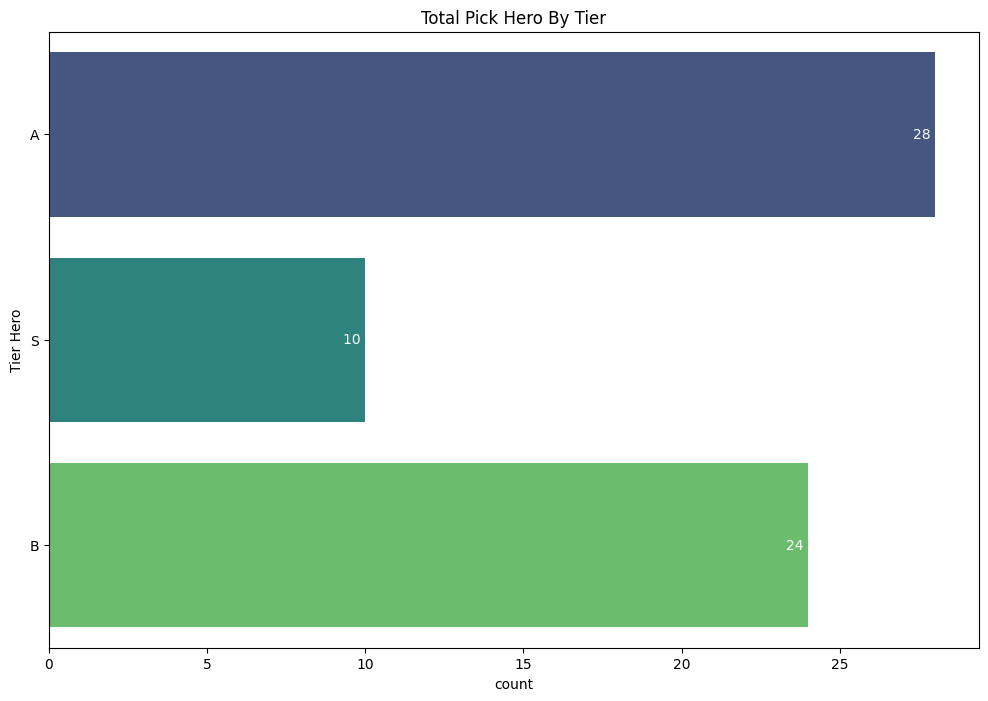

In [19]:
def annotate_bars(ax):
    '''fungsi untuk memberikan anotasi pada bar'''
    for bar in ax.patches:
        x, y = bar.get_xy()
        ax.text(
            x + bar.get_width(), y + bar.get_height()/2, f'{bar.get_width():.0f} ',
            va='center', ha='right', color='white'
        )
    return ax
fig, ax = plt.subplots(figsize=(12,8))

ax = sns.countplot(data=pick_hero, y='Tier Hero',hue='Tier Hero', palette='viridis')

ax.set_title('Total Pick Hero By Tier')


annotate_bars(ax)

plt.show()

In [20]:
pick_hero

Win,Pick,Win,Lose,Total Pick,efectivity,win rate,freq_hero,win_hero,eff_hero,segmen,Tier Hero
52,Ruby,18.0,24.0,42.0,-6.0,42.86,4,2,1,7,A
12,Claude,20.0,12.0,32.0,8.0,62.50,4,3,3,10,S
32,Karrie,10.0,19.0,29.0,-9.0,34.48,4,2,1,7,A
25,Guinevere,20.0,8.0,28.0,12.0,71.43,4,3,3,10,S
11,Cici,11.0,16.0,27.0,-5.0,40.74,4,2,1,7,A
...,...,...,...,...,...,...,...,...,...,...,...
56,Uranus,0.0,1.0,1.0,-1.0,0.00,1,1,1,3,B
20,Franco,0.0,1.0,1.0,-1.0,0.00,1,1,1,3,B
22,Gloo,1.0,0.0,1.0,1.0,100.00,1,4,3,8,A
23,Gord,1.0,0.0,1.0,1.0,100.00,1,4,3,8,A


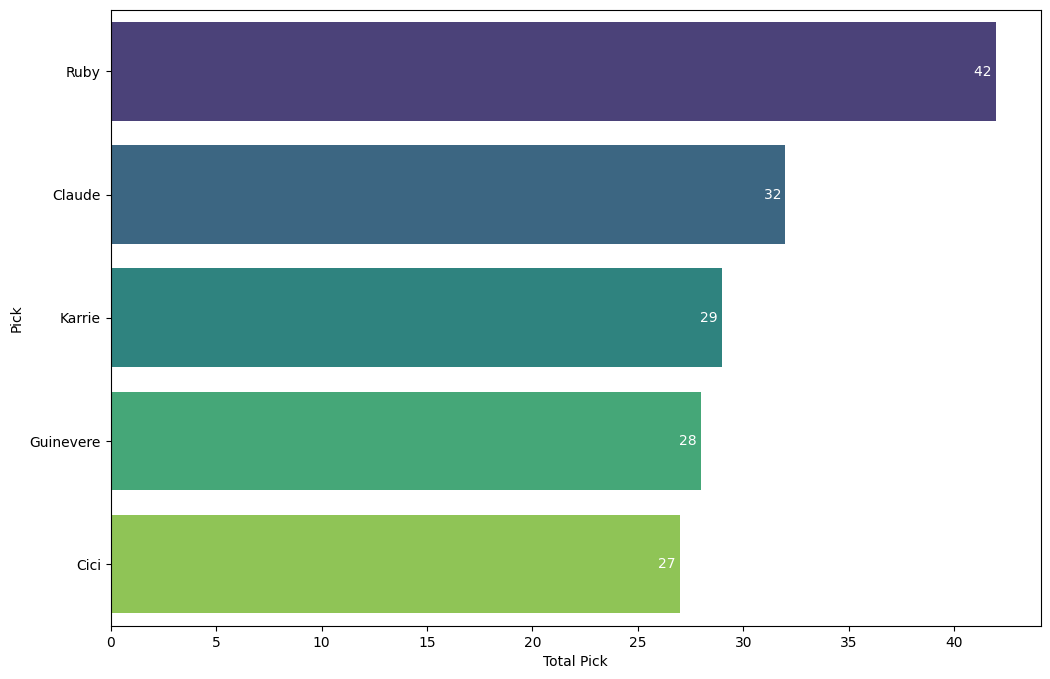

In [21]:
fig, ax = plt.subplots(figsize=(12,8))

ax = sns.barplot(data=pick_hero[:5], y='Pick',x='Total Pick' ,hue='Pick', palette='viridis')

annotate_bars(ax)

plt.show()

In [22]:
def annotate_bars2(ax):
    '''Fungsi untuk memberikan anotasi pada bar'''
    for bar in ax.patches:
        x, y = bar.get_xy()
        width = bar.get_width()
        height = bar.get_height()
        if width >= 0:
            ax.text(
                x + width, y + height/2, f'{width:.0f}',
                va='center', ha='right', color='white'
            )
        else:
            ax.text(
                x + width, y + height/2, f'{width:.0f}',
                va='center', ha='left', color='white'
            )
    return ax


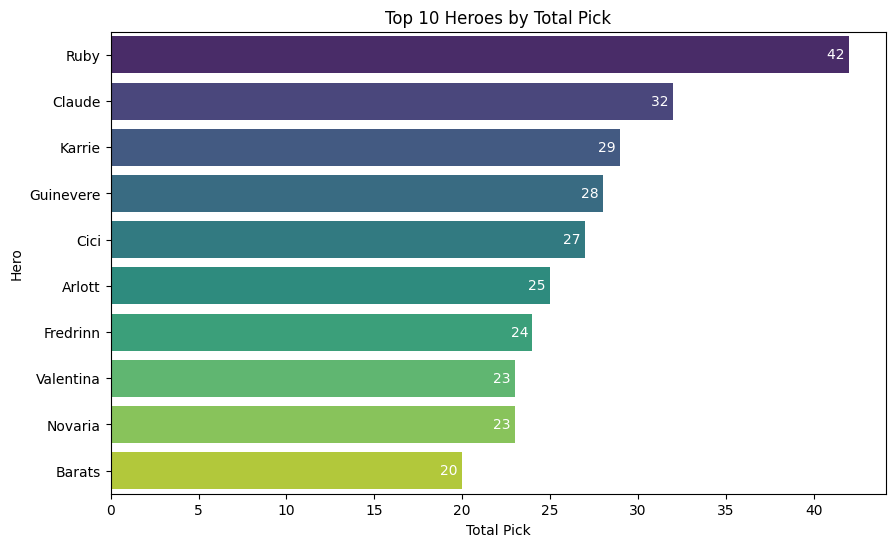

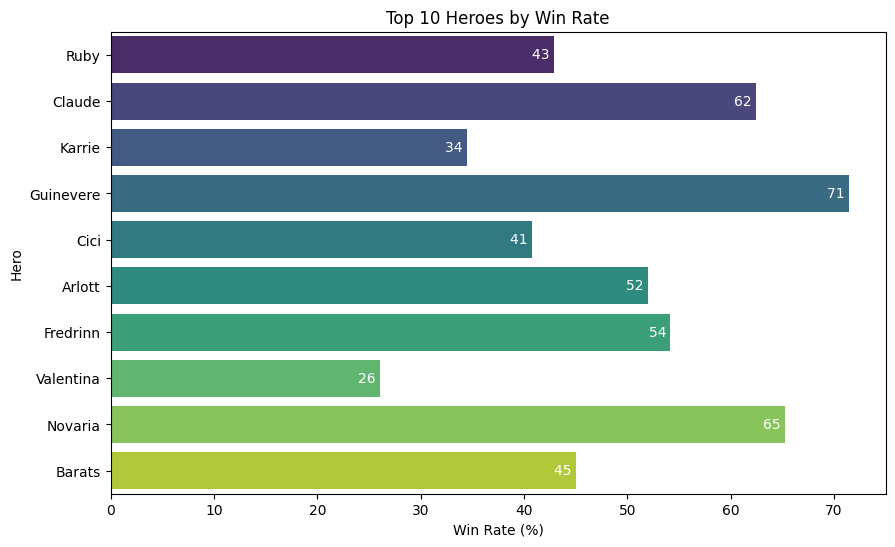

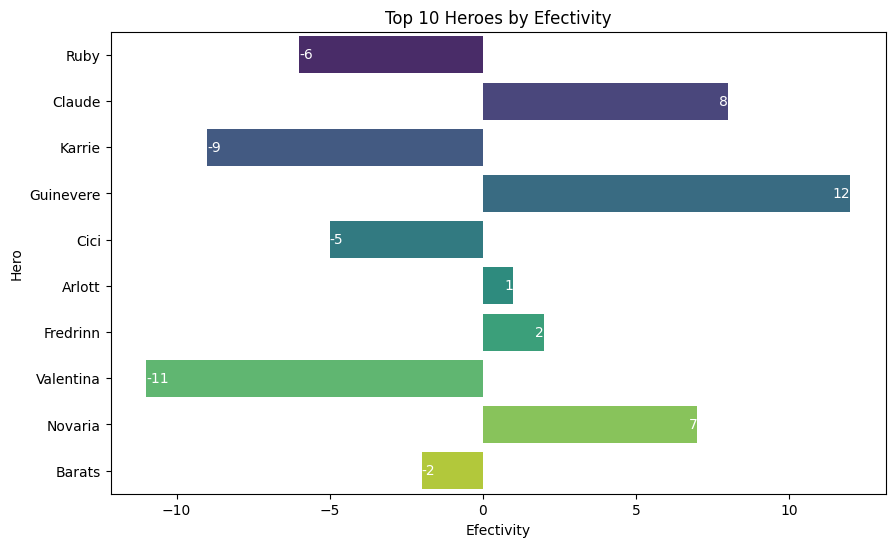

C:\Users\EZA\AppData\Local\Temp\ipykernel_7716\251137215.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax4 = sns.countplot(x='Tier Hero', data=pick_hero, order=['S', 'A', 'B'], palette='viridis')


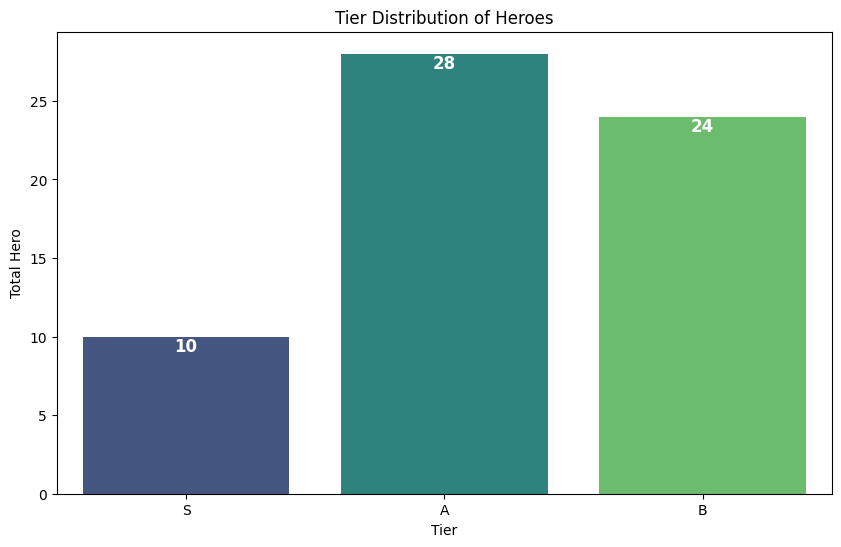

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preparation
top_10_pick_hero = pick_hero.head(10)

# Plot
plt.figure(figsize=(10, 6))
ax1 = sns.barplot(x='Total Pick', y='Pick', data=top_10_pick_hero,hue='Pick', palette='viridis')
annotate_bars(ax1)
plt.title('Top 10 Heroes by Total Pick')
plt.xlabel('Total Pick')
plt.ylabel('Hero')
plt.show()

plt.figure(figsize=(10, 6))
ax2 = sns.barplot(x='win rate', y='Pick', data=top_10_pick_hero,hue='Pick', palette='viridis')
annotate_bars(ax2)
plt.title('Top 10 Heroes by Win Rate')
plt.xlabel('Win Rate (%)')
plt.ylabel('Hero')
plt.show()

plt.figure(figsize=(10, 6))
ax3 = sns.barplot(x='efectivity', y='Pick', data=top_10_pick_hero,hue='Pick', palette='viridis')
annotate_bars2(ax3)
plt.title('Top 10 Heroes by Efectivity')
plt.xlabel('Efectivity')
plt.ylabel('Hero')
plt.show()

plt.figure(figsize=(10, 6))
ax4 = sns.countplot(x='Tier Hero', data=pick_hero, order=['S', 'A', 'B'], palette='viridis')
for bar in ax4.patches:
    ax4.annotate(f'{bar.get_height():.0f}',
                (bar.get_x() + bar.get_width() / 2., bar.get_height()),
                ha='center', va='center',  # Posisi teks anotasi (horizontal dan vertikal)
                xytext=(0, -7),  # Jarak teks anotasi dari bar (horizontal, vertikal)
                textcoords='offset points',  # Koordinat teks anotasi
                fontsize=12,  # Ukuran font teks anotasi
                color='white',  # Warna teks anotasi
                fontweight='semibold'  # Ketebalan huruf teks anotasi
                )

plt.title('Tier Distribution of Heroes')
plt.xlabel('Tier')
plt.ylabel('Total Hero')
plt.show()


In [24]:
team_stat

Win,Team,Lose,Win,Total Match,win_rate
0,ap.bren,2.0,11.0,13.0,84.62
9,onic,4.0,9.0,13.0,69.23
5,fire flux esports,5.0,8.0,13.0,61.54
10,rrq hoshi,5.0,8.0,13.0,61.54
11,royal cybersports club,5.0,5.0,10.0,50.00
3,burmese ghouls,4.0,4.0,8.0,50.00
6,homebois,4.0,4.0,8.0,50.00
4,deus vult,4.0,3.0,7.0,42.86
13,team flash,4.0,3.0,7.0,42.86
15,twisted minds,5.0,2.0,7.0,28.57


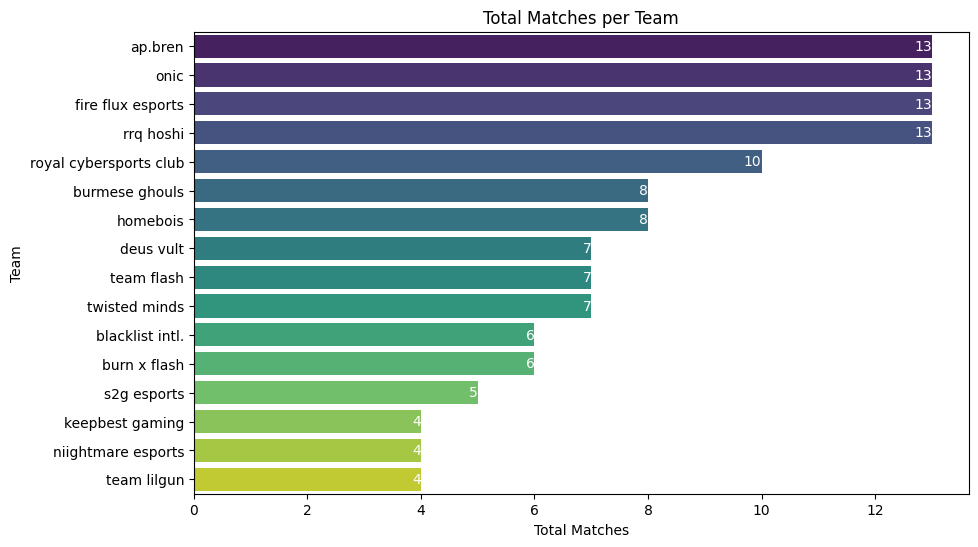

In [25]:
plt.figure(figsize=(10, 6))

# Plot
ax = sns.barplot(x='Total Match', y='Team', data=team_stat, hue='Team',palette='viridis')

# Set labels and title

annotate_bars2(ax)
plt.xlabel('Total Matches')
plt.ylabel('Team')
plt.title('Total Matches per Team')


# Show plot
plt.show()

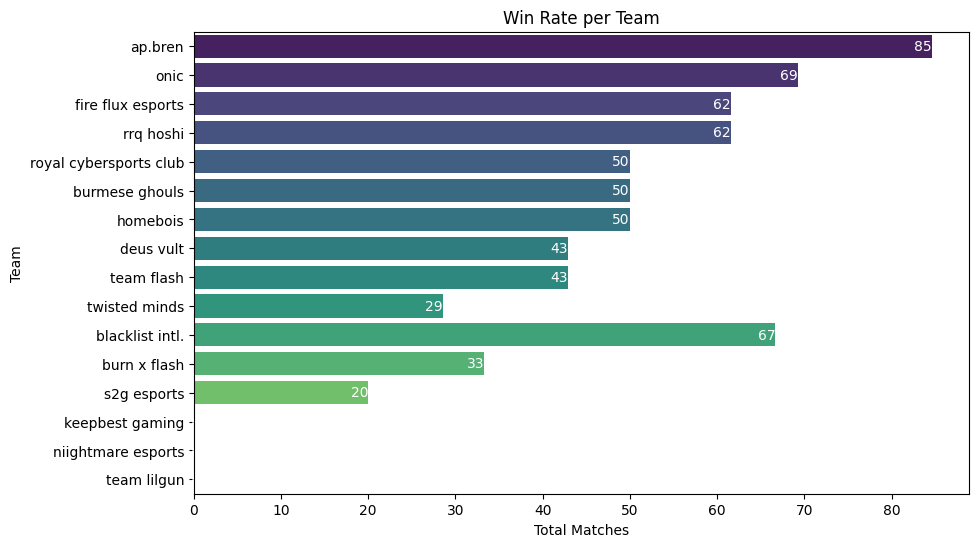

In [26]:
plt.figure(figsize=(10, 6))

# Plot
ax = sns.barplot(x='win_rate', y='Team', data=team_stat, hue='Team',palette='viridis')




# Set labels and title

annotate_bars2(ax)
plt.xlabel('Total Matches')
plt.ylabel('Team')
plt.title('Win Rate per Team')


# Show plot
plt.show()

In [27]:
potensial_player[:5]

,Players,Team,MVP,Total Macth,win rate
69,Super Marco,AP.Bren,6,13,46.15
64,Skylar,RRQ Hoshi,4,13,30.77
59,Sanz,ONIC,4,13,30.77
20,FlapTzy,AP.Bren,4,13,30.77
73,Troublemaker,Royal Cybersports Club,3,10,30.00


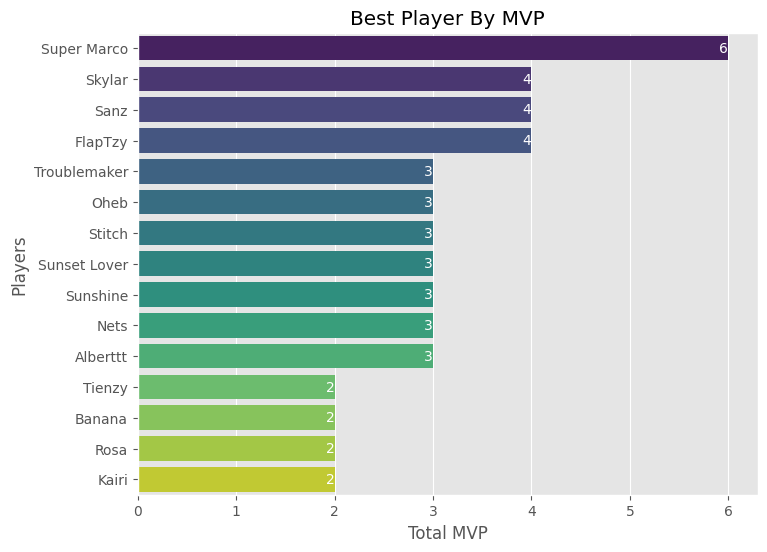

In [28]:
plt.figure(figsize=(8, 6))
plt.style.use('ggplot')

# Plot
ax = sns.barplot(x='MVP', y='Players', data=potensial_player[:15], hue='Players',palette='viridis')

# Set labels and title

annotate_bars2(ax)
plt.xlabel('Total MVP')
plt.ylabel('Players')
plt.title('Best Player By MVP')


# Show plot
plt.show()

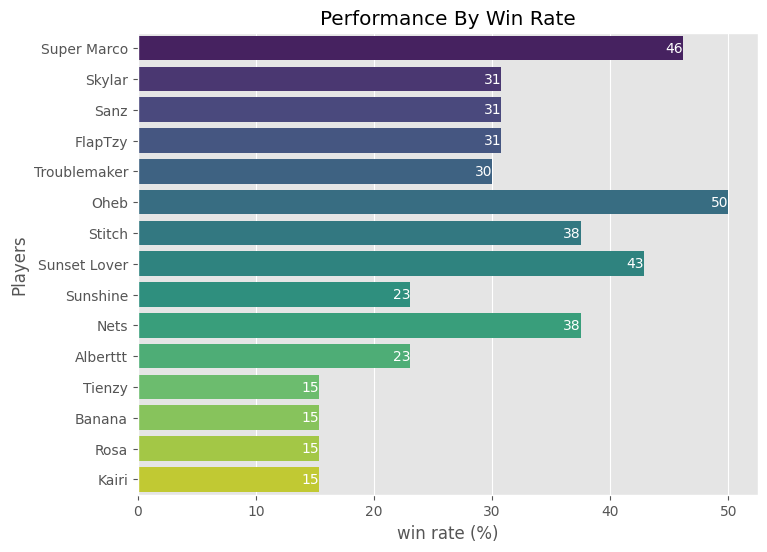

In [29]:
plt.figure(figsize=(8, 6))
plt.style.use('ggplot')

# Plot
ax = sns.barplot(x='win rate', y='Players', data=potensial_player[:15], hue='Players',palette='viridis')

# Set labels and title

annotate_bars2(ax)
plt.xlabel('win rate (%)')
plt.ylabel('Players')
plt.title('Performance By Win Rate')


# Show plot
plt.show()

In [30]:

player = df.groupby(['Players','Team']).agg({
    'MVP' : 'sum',
    'Win' : 'count'
}).reset_index().rename(columns={'Win': 'Total Macth'}).sort_values(by=['MVP'],ascending=False)

player = player[player['MVP'] > 0]
player['win rate'] = round(player['MVP'] / player['Total Macth']*100,2)
player

,Players,Team,MVP,Total Macth,win rate
69,Super Marco,ap.bren,6,13,46.15
64,Skylar,rrq hoshi,4,13,30.77
59,Sanz,onic,4,13,30.77
20,FlapTzy,ap.bren,4,13,30.77
73,Troublemaker,royal cybersports club,3,10,30.00
47,Oheb,blacklist intl.,3,6,50.00
66,Stitch,burmese ghouls,3,8,37.50
67,Sunset Lover,deus vult,3,7,42.86
68,Sunshine,fire flux esports,3,13,23.08
44,Nets,homebois,3,8,37.50


## **Penting Banget**

In [31]:
# import streamlit as st
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Buat visualisasi untuk efektivitas hero, win rate hero, dan statistik tim

# # Visualisasi untuk efektivitas hero
# def plot_hero_effectiveness():
#     # Kode untuk membuat visualisasi efektivitas hero
#     pass

# # Visualisasi untuk win rate hero
# def plot_hero_win_rate():
#     # Kode untuk membuat visualisasi win rate hero
#     pass

# # Visualisasi untuk statistik tim
# def plot_team_statistics():
#     # Kode untuk membuat visualisasi statistik tim
#     pass

# # Daftar pilihan visualisasi
# visualization_options = ["Efektivitas Hero", "Win Rate Hero", "Statistik Tim"]

# # Main function
# def main():
#     st.title("Visualisasi Dota 2 Data")

#     # Dropdown untuk memilih visualisasi
#     selected_option = st.selectbox("Pilih Visualisasi:", visualization_options)

#     # Tampilkan visualisasi yang dipilih
#     if selected_option == "Efektivitas Hero":
#         st.subheader("Efektivitas Hero")
#         plot_hero_effectiveness()
#     elif selected_option == "Win Rate Hero":
#         st.subheader("Win Rate Hero")
#         plot_hero_win_rate()
#     elif selected_option == "Statistik Tim":
#         st.subheader("Statistik Tim")
#         plot_team_statistics()

# if __name__ == "__main__":
#     main()


In [32]:
# import streamlit as st
# import os

# st.title('VISUALIZATION')

# option = ['Win Rate Hero', 'Efektivitas Hero', 'Tier Hero']
# pilihan = st.selectbox('Pilih Grafik', option)

# if pilihan == 'Win Rate Hero':
#     st.subheader('Win Rate')
#     if st.button('Get Graph'):
#         # Path ke file gambar di folder yang sama
#         image_path = os.path.join(os.getcwd(), "nama_file_gambar.jpg")  # Ganti "nama_file_gambar.jpg" dengan nama file gambar yang sesuai
#         st.image(image_path, use_column_width=True)
# elif pilihan == 'Efektivitas Hero':
#     st.subheader('Efektivitas')
#     if st.button('Get Graph'):
#         # Path ke file gambar di folder yang sama
#         image_path = os.path.join(os.getcwd(), "nama_file_gambar.jpg")  # Ganti "nama_file_gambar.jpg" dengan nama file gambar yang sesuai
#         st.image(image_path, use_column_width=True)
# elif pilihan == 'Tier Hero':
#     st.subheader('Tier')
#     if st.button('Get Graph'):
#         # Path ke file gambar di folder yang sama
#         image_path = os.path.join(os.getcwd(), "nama_file_gambar.jpg")  # Ganti "nama_file_gambar.jpg" dengan nama file gambar yang sesuai
#         st.image(image_path, use_column_width=True)
